all these functions here are only made using NumPy, without using any other libraries like pandas, scikit-learn, or scipy. I run a complete machine learning process from preprocessing to model performance testing by using the functions to develop.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=False)

X = california_housing.data
y = california_housing.target

using both features and labels. To handle it correctly, it need to be familiar with its axis concept as it no longer has indices and columns that you can check by printing the variable.

In [3]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### 1. Preprocessing

The first task is to open the dataset and preprocess it into the form that the model can understand. It involves imputation, train_test_split, standardization, and normalization. Some functions are already covered by the first lab.


- Standardization: Make features have the same standard deviaton and mean.

- Normalization: Make the range of value normalized into [0, 1]. This means that each column's minimum value should be zero and maximum value should be one.

In [5]:
def standardize(data):
  """
  Input: NumPy ndarray
  Output: NumPy ndarray with column mean == 0 and std == 1
  """
  data_standard = (data - data.mean(axis=0)) / data.std(axis=0)
  return data_standard

def normalize(data):
  """"
  Input: NumPy ndarray
  Output: NumPy ndarray with column min == 0 and max == 1
  """
  min_value = data.min(axis=0)
  max_value = data.max(axis=0)
  data_output = (data - min_value) / (max_value - min_value)
  return data_output

def standardize(data):
  """
  Input: Pandas DataFrame
  Output: Pandas DataFrame with mean == 0 and std == 1
  """
  mean = np.mean(data, axis=0)
  std = np.std(data, axis=0)
  data_new = (data - mean) / std
  return data_new

def normalize(data):
  """"
  Input: Pandas DataFrame
  Output: Pandas DataFrame with min == 0 and max == 1
  """

  return (data - np.min(data, axis=0))/(np.max(data, axis=0) - np.min(data, axis=0))


Let's apply both functions separately and create X_standardized and X_normalized.

In [6]:
X_standardized = standardize(X)
X_normalized = normalize(X)

Creating a function to check the dataset's min, max, mean, std of each feature. You can re-use your lab function (**describe**) but this time you are not allowed to use Pandas DataFrame. There is no expected format for this function if you are successfully able to plot four statistics (min, max, mean, std). 

In [7]:
def describe(data):
  """
  Describe four statistics of the dataset.
  
  Input: NumPy ndarray
  Output: vertical min, max, mean, standard deviation
  """
  
  print("Min: ", np.min(data, axis=0))
  print("Max: ", np.max(data, axis=0))
  print("Mean: ", np.mean(data, axis=0))
  print("Std: ", np.std(data, axis=0))

Using this function, let's check if your **standardize** and **normalize** functions are correctly working. 
- ** output should be the same as the one below.**

In [8]:
describe(X_standardized)

Min:  [-1.77429947 -2.19618048 -1.8523186  -1.61076772 -1.25612255 -0.22899997
 -1.447568   -2.38599234]
Max:  [  5.85828581   1.85618152  55.16323628  69.57171326  30.25033022
 119.41910319   2.95806762   2.62528006]
Mean:  [ 6.60969987e-17  5.50808322e-18  6.60969987e-17 -1.06030602e-16
 -1.10161664e-17  3.44255201e-18 -1.07958431e-15 -8.52651283e-15]
Std:  [1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
describe(X_normalized)

Min:  [0. 0. 0. 0. 0. 0. 0. 0.]
Max:  [1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  [0.23246376 0.54195071 0.03248795 0.02262871 0.03986874 0.00191395
 0.32857188 0.47612505]
Std:  [0.13101721 0.24676966 0.01753907 0.0140484  0.03173953 0.00835784
 0.226982   0.19955012]


dividing the dataset into two parts: {a training set, a test set} and only use the training set to train the model.

In [10]:
def train_test_split(X, y, test_ratio = 0.3):
  # simulation
  # cross-val
  
  """
  Input:
    - X: a set of features
    - y: corresponding labels
    - test_ratio: ratio of the test set
    
  Output:
    - X_train: separated training instances
    - X_test: separated test instances
    - y_train: separated training labels
    - y_test: separated test labels
  
  1. Randomly shuffle the indices of the data instances
  2. Divide the indices into two parts with the ratio of [1-test ratio:test ratio]
  3. Select training instances and labels with the first set of indices and test instances and labels with the second set of indices
  4. Return the training set and the test set
  """
  #np.random.seed(12345)
  rng = np.random.permutation(len(X))
  test_size = int(len(X)*(test_ratio))
  train_ind = rng[test_size:]
  test_ind = rng[:test_size]
  return X[train_ind] , X[test_ind], y[train_ind], y[test_ind]

Spliting dataset into training and test sets with `test ratio = 0.3`.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.3)

After applying train_test_split function, you can check the shape of each subset. The training set should have 14,448 rows while the test set might have 6,192 records.

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

 Creating two functions (**apply_standardization**, **apply_normalization**) that uses training set's statistics and apply standardization or normalization to both sets.

In [13]:
def apply_standardization(X_train, X_test):
  """
  Input:
    - X_train: training instances
    - X_test: test instances

  Output:
    - X_train_standardized
    - X_test_standardized

  Use training set's mean and standard deviation to standardize both training and test sets
  """
  mean = np.mean(X_train, axis=0)
  std = np.std(X_train, axis=0)
  X_train_standardized = (X_train - mean) / std
  X_test_standardized = (X_test - mean) / std
  return X_train_standardized, X_test_standardized

In [14]:
def apply_normalization(X_train, X_test):
  """
  Input:
    - X_train
    - X_test

  Output:
    - X_train_standardized
    - X_test_standardized
  """
  max_value = np.max(X_train, axis=0)
  min_value = np.min(X_train, axis=0)
  X_train_standardized = (X_train - min_value) / (max_value - min_value)
  X_test_standardized = (X_test - min_value) / (max_value - min_value)
  return X_train_standardized, X_test_standardized

- Apply two functions (**apply_standardization**, **apply_normalization**) to created standardized and normalized datasets.

In [15]:
X_train_standardized, X_test_standardized = apply_standardization(X_train, X_test)
X_train_normalized, X_test_normalized = apply_normalization(X_train, X_test)

Checking the statistics using describe method. 

In [16]:
describe(X_train_standardized)

Min:  [-1.77984117 -2.11947543 -1.75865295 -1.41639425 -1.21807626 -0.20527725
 -1.43606933 -2.39547596]
Max:  [  5.88589575   1.85028562  52.37164895  64.61802314  29.37600436
 106.24817184   2.97788143   2.52307343]
Mean:  [-9.39866263e-15  1.71973915e-16 -7.06439241e-15 -1.49168331e-14
  3.25159796e-17 -4.72230920e-16 -5.66941289e-14  1.80664822e-15]
Std:  [1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
describe(X_test_standardized)

Min:  [-1.77984117 -2.19887065 -1.74225417 -1.49805937 -1.21378885 -0.1737262
 -1.44076502 -2.33561532]
Max:  [ 5.88589575  1.85028562 19.50893121 20.21319655 10.14183798 42.77983604
  2.97788143  2.61286439]
Mean:  [ 0.00721618 -0.01475838 -0.00023439 -0.00645906  0.00557054 -0.00510376
  0.03692658 -0.03626547]
Std:  [1.01438783 0.9972842  0.81925066 0.73644982 0.89984358 0.55256454
 1.00933777 0.99758704]


In [18]:
describe(X_train_normalized)

Min:  [0. 0. 0. 0. 0. 0. 0. 0.]
Max:  [1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  [0.23218135 0.53390504 0.03248925 0.02144933 0.03981412 0.00192833
 0.32534784 0.48702895]
Std:  [0.1304506  0.25190433 0.01847394 0.01514362 0.03268606 0.00939378
 0.22655441 0.20331198]


In [19]:
describe(X_test_normalized)

Min:  [ 0.         -0.02        0.00030295 -0.00123671  0.00014014  0.00029638
 -0.00106383  0.01217039]
Max:  [1.         1.         0.39289609 0.32755026 0.37131086 0.40379258
 1.         1.01825558]
Mean:  [0.23312271 0.53018734 0.03248492 0.02135152 0.03999619 0.00188039
 0.33371371 0.47965575]
Std:  [0.1323275  0.25122021 0.01513479 0.01115251 0.02941234 0.00519067
 0.22866992 0.20282139]


### 2. Linear regression

Now it is ready to put the dataset to train a model. 

- Creating the **solver** function that creates a linear regression line and return the coefficents. 
-  **all available features** of the dataset are used.
- adding one column representing a bias to your feature matrix.

The normal equation can be represented as follows:

$\theta = (\textbf{X}^T \cdot \textbf{X})^{-1} \cdot \textbf{X}^T \cdot \textbf{y}$

In [20]:
def solver(X, y):
  """
  Get the weights and bias of linear regression classifier on the input dataset (X, y).

  Input: 
   - X: a set of features
   - y: labels
  Output:
   - theta: weights and bias of the linear regression
  """
  bias = np.ones([X.shape[0],1])
  data_X = np.concatenate([X,bias],axis=1)
  normal_equation = np.linalg.inv(data_X.T @ data_X) @ data_X.T @ y
  return normal_equation



- Runing the **solve** function on **X_train_standardized** and **y_train** and save the result to **theta**.

In [21]:
theta = solver(X_train_standardized, y_train)
print(theta)

[ 0.82068913  0.12615715 -0.25578635  0.30210798 -0.00378871 -0.0448
 -0.90409719 -0.87281663  2.06391117]


- Creating the **predict** function which put each instance into the regression equation to predict the value. **DO NOT USE ANY LOOP**.

In [22]:
def predict(X, theta):
  """
  Input: 
   - X: data instances to predict
   - theta: trained regression coefficients

  Output:
   - y_hat: predicted values (X @ weight) + bias
  """
  # bias = np.ones([X.shape[0],1])
  # data_X = np.concatenate([X,bias],axis=1)
  # result = np.dot(data_X, theta)


  weight = theta[:-1]
  bias = theta[-1:]
  y_hat = np.dot(X, weight) + bias

  return y_hat

In [23]:
#This predict function should be able to return the predicted value of the housing price. Then now you might want to return the mean squared error (and its variants) of the whole model. There can be many different metrics but here you will measure the rooted mean squared error (RMSE). RMSE can be calculated as follows: 

$RMSE = \sqrt{\frac{1}{n}\sum_{t=1}^{n}(\hat{y}_t - y_t)^2} $.

Note that $\hat{y}$ is a predicted label and $y$ is a true label.

- Create a function **rooted_mean_squared_error** that calculates the RMSE value.

In [24]:
def rooted_mean_squared_error(X, y, theta):
  """
  Input:
    - X_test: data instances to test
    - y_test: true class labels of the corresponding data instances (X_test)
    - theta: trained regression coefficients

  Output:
    - RMSE: the RMSE score

  Use predict function to calculate our predicted values.
  """
  y_hat = predict(X, theta)
  RMSE = np.sqrt(np.mean((y - y_hat)**2))
  return RMSE



Even though the RMSE is generally the preferred performance measure for
regression tasks, in some contexts you may prefer to use another function. For
example, suppose that there are many outliers. In that case, you may
consider using the mean absolute error (MAE). It's direct translation of l1 and l2 norm. The higher the norm index, the more it focuses on large values and
neglects small ones. This is why the RMSE is more sensitive to
outliers than the MAE. But when outliers are exponentially rare (like
in a bell-shaped curve), the RMSE performs very well and is
generally preferred.

MAE can be calculated as follows:

$MAE = \frac{1}{n}\sum_{t=1}^{n}|\hat{y}_t - y_t|$

- Implementing a function for MAE **mean_absolute_error**, which receives the same parameters *X*, *y*, and *theta*.

In [25]:
def mean_absolute_error(X, y, theta):
  """
  Input:
    - X_test: data instances to test
    - y_test: true values of the corresponding data instances (X_test)
    - theta: trained regression coefficients

  Output:
    - MAE: MAE score

  Use predict function to calculate our predicted values.
  """
  y_hat = predict(X, theta)
  MAE = np.mean(np.abs(y-y_hat) )
  return MAE

Train your regression model on the **standardized** training set and evaluate your method with two different scores: RMSE and MAE. Print two scores here.

In [26]:
# rmse_score = rooted_mean_squared_error(X_test_standardized, y_test, theta) # CHANGE IT!
# mae_score = mean_absolute_error(X_test_standardized, y_test, theta) # CHANGE IT!
rmse_score = rooted_mean_squared_error(X_train_standardized, y_train, theta) 
mae_score = mean_absolute_error(X_train_standardized, y_train, theta) 

In [27]:
rmse_score, mae_score

(0.7218937315055918, 0.5296562692287425)

### 4. Linear regression with regularization



A closed form solution to Ridge can be represented as follows:

$\theta = (\textbf{X}^T \cdot \textbf{X} + \lambda \textbf{I})^{-1} \cdot \textbf{X}^T \cdot \textbf{y}$

where $\textbf{I}$ is an $(n+1) \times (n+1) $ identity matrix, since the feature matrix also includes the bias column.


In [28]:
def solver_with_ridge(X, y, alpha):
  """
  Get the weights and bias of the linear regression line on the dataset X, using the labels y.

  Input: 
   - X: a set of features to get weights
   - y: class labels
  Output:
   - theta: weights and bias of the ridge regression
  """
  bias = np.ones([X.shape[0],1])
  data_X = np.concatenate([X,bias],axis=1)
  I = np.eye(X.shape[1]+1)
  theta = np.linalg.inv(data_X.T @ data_X + (alpha * I)) @ data_X.T @ y
  return theta


  

Here, comparing the performances changing the $\lambda$ value. Use the $\lambda$ value from 0 to 30 in increments of 0.1. Use RMSE as a score metric. 


In [29]:
scores = []
alpha_values = np.arange(0, 30.0, 0.1)
for alpha in alpha_values:
    score = rooted_mean_squared_error(X_test_standardized,y_test,solver_with_ridge(X_train_standardized, y_train, alpha))
    scores.append(score)
len(scores)


300

Plotting the graph of different scores here. The resulting plot behaves in a different way based on your split training and test sets. Sometimes, the error just decreases or increases, but you can also see that the error decreases first, but after some point, it starts to increase. If you are interested, repeat many times to check different plots and you can even change the range from [0, 30] to something else. Uncomment the block below!

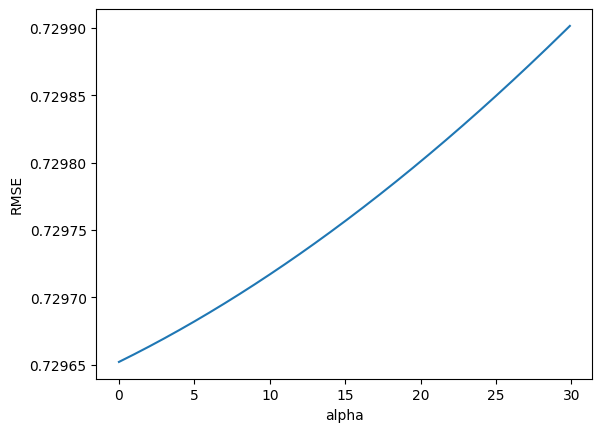

In [30]:
plt.plot(np.arange(0, 30, 0.1), scores)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

### 5. Model validation

In [31]:
def repeated_hold_out(X, y, k, test_ratio):
  """
  Input:
    - X: features
    - y: labels
    - test_ratio: ratio of the test set
  Output:
    - score: the average of k different test scores
  
  1. Iterate k times to perform k validation processes.
  2. For each iteration, split the dataset into training and test sets with *random* indices.
   - Note that each iteration should create different training and test sets.
  3. Use *standardization* to fix the scale of the dataset, you should only use the training set's properties.
  4. Fit your model with *solver* (without ridge) on the training set.
  5. Save your *RMSE* score into the list *scores*
  6. After all the iterations, return the average of *scores*.

  """
  scores = []
  for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio)
    X_train_standardized, X_test_standardized = apply_standardization(X_train, X_test)
    theta = solver(X_train_standardized, y_train)
    scores.append(rooted_mean_squared_error(X_test_standardized, y_test, theta))
  average = sum(scores) / k
  return average

In [32]:
holdout_score = repeated_hold_out(X, y, k=5, test_ratio=0.2)
holdout_score

0.7333994668566514

### 6. Put things together


* Creating `pipeline` 

In [36]:
def pipeline(X, y, k = 5, test_ratio = 0.2, norm_method = "standardization", eval_method = "RMSE", alpha = 0):
  """
  Input:
    - X: features
    - y: labels
    - test_ratio: ratio of the test set
  Output:
    - score: the average of k different test scores
  
  1. Iterate k times to perform k validation processes.
  2. For each iteration, split the dataset into the training and test sets with *random* indices.
   - Note that each iteration should create different training and test sets.
  3. Check the parameter *norm_method*
    - if norm_method == standardization:
      - Use *standardization* to fix the scale of the dataset, you should only use the training set's properties.
    - if norm_method == normalization:
      - Use *normalization* to fix the scale of the dataset, you should only use the training set's properties.
  4. Fit your model with *solver_with_ridge" on the training set. Use alpha from the parameter.
  5. Check the parameter "eval_method"
    - if eval_method == "RMSE"
      - Save your *RMSE* score into the list *scores*
    - if eval_method == "MAE"
      - Save your *MAE* score into the list *scores*

  6. After all the iterations, return the average of *scores*.

  """
  scores = []
  for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio)
    if norm_method == 'standardization':
      X_train_norm, X_test_norm = apply_standardization(X_train, X_test)
    elif norm_method == 'normalization':
      X_train_norm, X_test_norm = apply_normalization(X_train, X_test)
    else:
      X_train_norm = X_train
    theta = solver_with_ridge(X_train_norm, y_train, alpha)
    if eval_method == 'RMSE':
      scores.append(rooted_mean_squared_error(X_test_norm, y_test, theta))
    elif eval_method == 'MAE':
      scores.append(mean_absolute_error(X_test_norm, y_test, theta))
  average = sum(scores) / k

  return average